In [1]:
import geopandas as gpd
import pandas as pd
from sklearn.cluster import DBSCAN
from shapely.ops import unary_union
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
# import libpysal

In [2]:
from shapely import wkt

block_groups = pd.read_csv("data/Census_Block_Groups_2020_20240131.csv", dtype={'GEOID': str})
block_groups['geometry'] = block_groups['the_geom'].apply(wkt.loads)
block_groups.drop(columns=['the_geom'], inplace=True)
block_groups = gpd.GeoDataFrame(block_groups, crs='EPSG:4326')
block_groups

OBJECTID         GEOID  CTBLOCKGROUP     CT  BLOCKGROUP  Shape_Length  \
0         1807  060730200191        200191  20019           1  19520.779251   
1         1676  060730189034        189034  18903           4  10026.669194   
2          878  060730108001        108001  10800           1   8502.270733   
3         1009  060730133211        133211  13321           1   8139.283833   
4         1061  060730134232        134232  13423           2  69292.332370   
...        ...           ...           ...    ...         ...           ...   
2052      1770  060730198031        198031  19803           1  29357.559885   
2053        28  060730008002          8002    800           2   5298.407410   
2054      1677  060730189041        189041  18904           1   7466.510835   
2055      1628  060730186012        186012  18601           2  15011.933296   
2056      1050  060730134183        134183  13418           3  10916.092616   

        Shape_Area                                           geometry  
0     1.281500e+07  MULTIPOLYGON (((-117.20764 33.14182, -117.2077...  
1     5.460566e+06  MULTIPOLYGON (((-117.25339 33.39086, -117.2527...  
2     3.821664e+06  MULTIPOLYGON (((-117.17970 32.68618, -117.1798...  
3     3.846955e+06  MULTIPOLYGON (((-116.95831 32.62129, -116.9582...  
4     1.599042e+08  MULTIPOLYGON (((-116.96373 32.70351, -116.9636...  
...            ...                                                ...  
2052  1.915028e+07  MULTIPOLYGON (((-117.29525 33.17992, -117.2946...  
2053  1.534904e+06  MULTIPOLYGON (((-117.13792 32.74383, -117.1379...  
2054  3.467576e+06  MULTIPOLYGON (((-117.25363 33.37684, -117.2536...  
2055  9.543736e+06  MULTIPOLYGON (((-117.34560 33.23710, -117.3448...  
2056  4.938705e+06  MULTIPOLYGON (((-116.98281 32.65011, -116.9826...  

[2057 rows x 8 columns]

In [3]:
df = gpd.read_file('data/BUSINESS_SITES.shp')
df = df[df['POINT_X'] >= 10]
df = df.to_crs(block_groups.crs)
df

APN  BCCCODE                        OWNNAM1  \
0      1.010101e+09    131.0    PACIFIC MARINE CREDIT UNION   
1      1.010101e+09    291.0              HRB TAX GROUP INC   
2      1.010101e+09    314.0         NORTH COUNTY PIZZA INC   
3      1.010101e+09    314.0  PIAZZA MANAGEMENT CORPORATION   
4      1.010101e+09    404.0             BRIDGESTONE RETAIL   
...             ...      ...                            ...   
98158  0.000000e+00    261.0                       XTRA INC   
98159  0.000000e+00    264.0             HONEYCOMB BUSINESS   
98160  0.000000e+00    298.0    ADVANCED LOGISTICS TECH INC   
98161  0.000000e+00    298.0                           AT&T   
98162  0.000000e+00    364.0            QUARRY SELF STORAGE   

                             OWNNAM2                         OWNNAM3  \
0                               None                            None   
1                    H&R BLOCK #6438                            None   
2            DBA DOMINOS PIZZA #8357                            None   
3                       OF SAN DIEGO   PIAZZA FAMILY RESTAURANTS INC   
4                     OPERATIONS LLC  DBA FIRESTONE COMPLT AUTO CARE   
...                              ...                             ...   
98158  OFFICE EQUIP&FURN SEE APT HSE                  #472-440-02-00   
98159                 (A CALIF CORP)             DBA LA PETITE ROUGE   
98160     EQUIPMENT LOCATED AT NAVAL   COMM CONTROL & OCEAN SURV CTR   
98161     EQUIPMENT LOCATED AT NAVAL   COMM CONTROL & OCEAN SURV CTR   
98162    A CALIF LIMITED PARTNERSHIP  DBA QUARRY SELF STORAGE U HAUL   

                           CAREOF   STRNUM STRFRA STRDIR        STRNAM STRTYP  \
0            ATTN ACCOUNTING DEPT   1278.0   None   None   ROCKY POINT     DR   
1      ATTN BUSINESS PP TAX #6438      1.0   None   None     H&R BLOCK    WAY   
2                            None      0.0   None   None   PO BOX 4489   None   
3            DBA MCDONALDS #34729  23113.0   None   None  PLAZA POINTE     DR   
4                   ATTN TAX DEPT    200.0   None      S           4TH    AVE   
...                           ...      ...    ...    ...           ...    ...   
98158                        None      0.0   None   None          None   None   
98159                        None   6840.0   None   None      EL CAJON   BLVD   
98160                        None   7968.0   None   None        ARJONS     DR   
98161                        None   3940.0   None   None           7TH    AVE   
98162                        None   6260.0   None   None        QUARRY     RD   

      STRSRM           CITY STATE CONTRY   ZIPCD1  ZIPCD2 LOCCOD    LOCNUM  \
0       None      OCEANSIDE    CA   None  92056.0     0.0   None  525111.0   
1       None    KANSAS CITY    MO   None  64105.0     0.0   None       0.0   
2       None      OCEANSIDE    CA   None  92052.0     0.0   None  520407.0   
3       #100   LAGUNA HILLS    CA   None  92653.0     0.0   None  430314.0   
4       #100      NASHVILLE    TN   None  37201.0     0.0   None   51091.0   
...      ...            ...   ...    ...      ...     ...    ...       ...   
98158   None           None  None   None      0.0     0.0   None    5802.0   
98159   None      SAN DIEGO    CA   None  92115.0     0.0   None    6844.0   
98160   #101      SAN DIEGO    CA   None  92126.0     0.0   None     271.0   
98161   None      SAN DIEGO    CA   None  92103.0     0.0   None     271.0   
98162   None  SPRING VALLEY    CA   None  91977.0     0.0   None    6260.0   

      LOCFRA LOCDIR          LOCNAM LOCTYP  LOCSRM          LOCCIT  \
0       None   None        BASILONE     RD  000501  CAMP PENDLETON   
1       None   None  CAMP PENDLETON   None    None       OCEANSIDE   
2       None   None        BASILONE     RD    None  CAMP PENDLETON   
3       None   None           BROWN     ST    None  CAMP PENDLETON   
4       None   None        BASILONE     RD    None  CAMP PENDLETON   
...      ...    ...             ...    ...     ...             .

#### Plotting Initial Sites & Geographies

<Axes: >

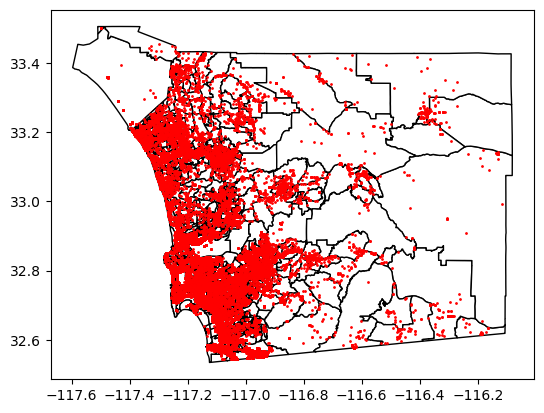

In [4]:
base = block_groups.plot(color='white', edgecolor='black')

df.plot(ax=base, marker='o', color='red', markersize=1)

In [5]:
# Join the nearest block_groups to each business
joined_blocks = df.sjoin_nearest(block_groups)
joined_blocks

/Users/kelvinnguyen/anaconda3/envs/gpd/lib/python3.11/site-packages/geopandas/array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


APN  BCCCODE                        OWNNAM1  \
0      1.010101e+09    131.0    PACIFIC MARINE CREDIT UNION   
1      1.010101e+09    291.0              HRB TAX GROUP INC   
2      1.010101e+09    314.0         NORTH COUNTY PIZZA INC   
3      1.010101e+09    314.0  PIAZZA MANAGEMENT CORPORATION   
4      1.010101e+09    404.0             BRIDGESTONE RETAIL   
...             ...      ...                            ...   
95648  7.600511e+09    298.0                 TOWNE PARK LLC   
95649  7.600511e+09    305.0          ON COMMAND VIDEO CORP   
95650  7.600511e+09     41.0       CORONADO CAYS YACHT CLUB   
95659  7.600560e+09    528.0           BRIAN SMOCK GOLF LLC   
97842  7.602394e+09      2.0  MURPHY CANYON CHAPEL OF LIGHT   

                       OWNNAM2                         OWNNAM3  \
0                         None                            None   
1              H&R BLOCK #6438                            None   
2      DBA DOMINOS PIZZA #8357                            None   
3                 OF SAN DIEGO   PIAZZA FAMILY RESTAURANTS INC   
4               OPERATIONS LLC  DBA FIRESTONE COMPLT AUTO CARE   
...                        ...                             ...   
95648                     None                            None   
95649         (LOEWS CORONADO)                  SEE 3022910000   
95650                     None                            None   
95659     DBA BRIAN SMOCK GOLF                            None   
97842                     None                            None   

                           CAREOF   STRNUM STRFRA STRDIR        STRNAM STRTYP  \
0            ATTN ACCOUNTING DEPT   1278.0   None   None   ROCKY POINT     DR   
1      ATTN BUSINESS PP TAX #6438      1.0   None   None     H&R BLOCK    WAY   
2                            None      0.0   None   None   PO BOX 4489   None   
3            DBA MCDONALDS #34729  23113.0   None   None  PLAZA POINTE     DR   
4                   ATTN TAX DEPT    200.0   None      S           4TH    AVE   
...                           ...      ...    ...    ...           ...    ...   
95648                        None    555.0   None      E         NORTH     LN   
95649                        None      0.0   None   None          None   None   
95650                        None     30.0   None      N    CARIBE CAY   BLVD   
95659                        None   2000.0   None   None       VISALIA    ROW   
97842                        None   3200.0   None   None         SANTO     RD   

      STRSRM          CITY STATE CONTRY   ZIPCD1  ZIPCD2 LOCCOD    LOCNUM  \
0       None     OCEANSIDE    CA   None  92056.0     0.0   None  525111.0   
1       None   KANSAS CITY    MO   None  64105.0     0.0   None       0.0   
2       None     OCEANSIDE    CA   None  92052.0     0.0   None  520407.0   
3       #100  LAGUNA HILLS    CA   None  92653.0     0.0   None  430314.0   
4       #100     NASHVILLE    TN   None  37201.0     0.0   None   51091.0   
...      ...           ...   ...    ...      ...     ...    ...       ...   
95648  #5020  CONSHOHOCKEN    PA   None  19428.0     0.0   None    4000.0   
95649   None          None  None   None      0.0     0.0   None    4000.0   
95650   None      CORONADO    CA   None  92118.0     0.0   None      30.0   
95659   None      CORONADO    CA   None  92118.0     0.0   None    2000.0   
97842   None     SAN DIEGO    CA   None  92124.0     0.0   None    3200.0   

      LOCFRA LOCDIR          LOCNAM LOCTYP  LOCSRM          LOCCIT  \
0       None   None        BASILONE     RD  000501  CAMP PENDLETON   
1       None   None  CAMP PENDLETON   None    None       OCEANSIDE   
2       None   None        BASILONE     RD    None  CAMP PENDLETON   
3       None   None           BROWN     ST    None  CAMP PENDLETON   
4       None   None        BASILONE     RD    None  CAMP PENDLETON   
...      ...    ...             ...    ...     ...             ...   
95648   None   None    CORONADO BAY     RD    None        CORONADO   
95649   

#### Creating New Shapes from K-Means clustering

In [6]:
# Cluster points together initially to get an idea of clusters, then use those clusters to create new shapes?

# kmeans using x, y values of businesses -> getting cluster labels -> finding nearest ctblock for those new labels, then dissolve

# Might just be better to use their k-means ++ rather than finding where things are based on the shape

from sklearn.cluster import KMeans

new_centers = block_groups.loc[block_groups['CTBLOCKGROUP'].isin(joined_blocks['CTBLOCKGROUP'].value_counts()
                                                                    .iloc[:70].index)].geometry.centroid

points = pd.DataFrame([joined_blocks['geometry'].x, joined_blocks['geometry'].y]).T.rename(columns={0: 'point_x', 1: 'point_y'})

# Assume 'data' is your DataFrame and 'geometry' is your geometry column
kmeans = KMeans(n_clusters=70)
kmeans.fit(points)

joined_blocks['cluster'] = kmeans.labels_

joined_blocks
# Get centers from clusters and use them as the centers to generate cluser

/var/folders/yx/7kn925_914qd3z72tqy9rlk80000gn/T/ipykernel_3035/2397274552.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  .iloc[:70].index)].geometry.centroid
/Users/kelvinnguyen/anaconda3/envs/gpd/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


APN  BCCCODE                        OWNNAM1  \
0      1.010101e+09    131.0    PACIFIC MARINE CREDIT UNION   
1      1.010101e+09    291.0              HRB TAX GROUP INC   
2      1.010101e+09    314.0         NORTH COUNTY PIZZA INC   
3      1.010101e+09    314.0  PIAZZA MANAGEMENT CORPORATION   
4      1.010101e+09    404.0             BRIDGESTONE RETAIL   
...             ...      ...                            ...   
95648  7.600511e+09    298.0                 TOWNE PARK LLC   
95649  7.600511e+09    305.0          ON COMMAND VIDEO CORP   
95650  7.600511e+09     41.0       CORONADO CAYS YACHT CLUB   
95659  7.600560e+09    528.0           BRIAN SMOCK GOLF LLC   
97842  7.602394e+09      2.0  MURPHY CANYON CHAPEL OF LIGHT   

                       OWNNAM2                         OWNNAM3  \
0                         None                            None   
1              H&R BLOCK #6438                            None   
2      DBA DOMINOS PIZZA #8357                            None   
3                 OF SAN DIEGO   PIAZZA FAMILY RESTAURANTS INC   
4               OPERATIONS LLC  DBA FIRESTONE COMPLT AUTO CARE   
...                        ...                             ...   
95648                     None                            None   
95649         (LOEWS CORONADO)                  SEE 3022910000   
95650                     None                            None   
95659     DBA BRIAN SMOCK GOLF                            None   
97842                     None                            None   

                           CAREOF   STRNUM STRFRA STRDIR        STRNAM STRTYP  \
0            ATTN ACCOUNTING DEPT   1278.0   None   None   ROCKY POINT     DR   
1      ATTN BUSINESS PP TAX #6438      1.0   None   None     H&R BLOCK    WAY   
2                            None      0.0   None   None   PO BOX 4489   None   
3            DBA MCDONALDS #34729  23113.0   None   None  PLAZA POINTE     DR   
4                   ATTN TAX DEPT    200.0   None      S           4TH    AVE   
...                           ...      ...    ...    ...           ...    ...   
95648                        None    555.0   None      E         NORTH     LN   
95649                        None      0.0   None   None          None   None   
95650                        None     30.0   None      N    CARIBE CAY   BLVD   
95659                        None   2000.0   None   None       VISALIA    ROW   
97842                        None   3200.0   None   None         SANTO     RD   

      STRSRM          CITY STATE CONTRY   ZIPCD1  ZIPCD2 LOCCOD    LOCNUM  \
0       None     OCEANSIDE    CA   None  92056.0     0.0   None  525111.0   
1       None   KANSAS CITY    MO   None  64105.0     0.0   None       0.0   
2       None     OCEANSIDE    CA   None  92052.0     0.0   None  520407.0   
3       #100  LAGUNA HILLS    CA   None  92653.0     0.0   None  430314.0   
4       #100     NASHVILLE    TN   None  37201.0     0.0   None   51091.0   
...      ...           ...   ...    ...      ...     ...    ...       ...   
95648  #5020  CONSHOHOCKEN    PA   None  19428.0     0.0   None    4000.0   
95649   None          None  None   None      0.0     0.0   None    4000.0   
95650   None      CORONADO    CA   None  92118.0     0.0   None      30.0   
95659   None      CORONADO    CA   None  92118.0     0.0   None    2000.0   
97842   None     SAN DIEGO    CA   None  92124.0     0.0   None    3200.0   

      LOCFRA LOCDIR          LOCNAM LOCTYP  LOCSRM          LOCCIT  \
0       None   None        BASILONE     RD  000501  CAMP PENDLETON   
1       None   None  CAMP PENDLETON   None    None       OCEANSIDE   
2       None   None        BASILONE     RD    None  CAMP PENDLETON   
3       None   None           BROWN     ST    None  CAMP PENDLETON   
4       None   None        BASILONE     RD    None  CAMP PENDLETON   
...      ...    ...             ...    ...     ...             ...   
95648   None   None    CORONADO BAY     RD    None        CORONADO   
95649   

<Axes: >

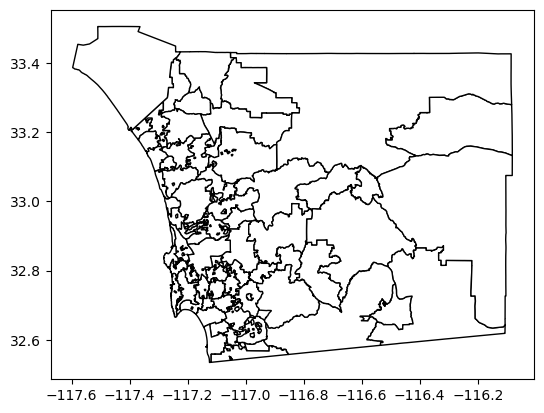

In [7]:
test1 = joined_blocks.groupby(['CTBLOCKGROUP', 'cluster'])['GEOID'].max().reset_index()
new_dict = test1.set_index('CTBLOCKGROUP')['cluster'].to_dict()

block_groups['test'] = block_groups['CTBLOCKGROUP'].map(new_dict)

new_blocks = block_groups.dissolve(by='test').reset_index()
new_blocks.plot(color='white', edgecolor='black')

In [8]:
### Trying with k-means, centers outward

df['APN']

0        1.010101e+09
1        1.010101e+09
2        1.010101e+09
3        1.010101e+09
4        1.010101e+09
             ...     
98158    0.000000e+00
98159    0.000000e+00
98160    0.000000e+00
98161    0.000000e+00
98162    0.000000e+00
Name: APN, Length: 98162, dtype: float64

In [9]:
from sklearn.cluster import KMeans

centroids = block_groups[block_groups['CTBLOCKGROUP'].isin(joined_blocks['CTBLOCKGROUP'].value_counts().iloc[:70].index)]['geometry'].centroid

# Assume 'data' is your DataFrame and 'geometry' is your geometry column
kmeans = KMeans(n_clusters=70)
kmeans.cluster_centers_ = list(zip(centroids.x, centroids.y))
kmeans.fit(points)

joined_blocks['cluster'] = kmeans.labels_

joined_blocks


/var/folders/yx/7kn925_914qd3z72tqy9rlk80000gn/T/ipykernel_3035/3469206652.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = block_groups[block_groups['CTBLOCKGROUP'].isin(joined_blocks['CTBLOCKGROUP'].value_counts().iloc[:70].index)]['geometry'].centroid
/Users/kelvinnguyen/anaconda3/envs/gpd/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


APN  BCCCODE                        OWNNAM1  \
0      1.010101e+09    131.0    PACIFIC MARINE CREDIT UNION   
1      1.010101e+09    291.0              HRB TAX GROUP INC   
2      1.010101e+09    314.0         NORTH COUNTY PIZZA INC   
3      1.010101e+09    314.0  PIAZZA MANAGEMENT CORPORATION   
4      1.010101e+09    404.0             BRIDGESTONE RETAIL   
...             ...      ...                            ...   
95648  7.600511e+09    298.0                 TOWNE PARK LLC   
95649  7.600511e+09    305.0          ON COMMAND VIDEO CORP   
95650  7.600511e+09     41.0       CORONADO CAYS YACHT CLUB   
95659  7.600560e+09    528.0           BRIAN SMOCK GOLF LLC   
97842  7.602394e+09      2.0  MURPHY CANYON CHAPEL OF LIGHT   

                       OWNNAM2                         OWNNAM3  \
0                         None                            None   
1              H&R BLOCK #6438                            None   
2      DBA DOMINOS PIZZA #8357                            None   
3                 OF SAN DIEGO   PIAZZA FAMILY RESTAURANTS INC   
4               OPERATIONS LLC  DBA FIRESTONE COMPLT AUTO CARE   
...                        ...                             ...   
95648                     None                            None   
95649         (LOEWS CORONADO)                  SEE 3022910000   
95650                     None                            None   
95659     DBA BRIAN SMOCK GOLF                            None   
97842                     None                            None   

                           CAREOF   STRNUM STRFRA STRDIR        STRNAM STRTYP  \
0            ATTN ACCOUNTING DEPT   1278.0   None   None   ROCKY POINT     DR   
1      ATTN BUSINESS PP TAX #6438      1.0   None   None     H&R BLOCK    WAY   
2                            None      0.0   None   None   PO BOX 4489   None   
3            DBA MCDONALDS #34729  23113.0   None   None  PLAZA POINTE     DR   
4                   ATTN TAX DEPT    200.0   None      S           4TH    AVE   
...                           ...      ...    ...    ...           ...    ...   
95648                        None    555.0   None      E         NORTH     LN   
95649                        None      0.0   None   None          None   None   
95650                        None     30.0   None      N    CARIBE CAY   BLVD   
95659                        None   2000.0   None   None       VISALIA    ROW   
97842                        None   3200.0   None   None         SANTO     RD   

      STRSRM          CITY STATE CONTRY   ZIPCD1  ZIPCD2 LOCCOD    LOCNUM  \
0       None     OCEANSIDE    CA   None  92056.0     0.0   None  525111.0   
1       None   KANSAS CITY    MO   None  64105.0     0.0   None       0.0   
2       None     OCEANSIDE    CA   None  92052.0     0.0   None  520407.0   
3       #100  LAGUNA HILLS    CA   None  92653.0     0.0   None  430314.0   
4       #100     NASHVILLE    TN   None  37201.0     0.0   None   51091.0   
...      ...           ...   ...    ...      ...     ...    ...       ...   
95648  #5020  CONSHOHOCKEN    PA   None  19428.0     0.0   None    4000.0   
95649   None          None  None   None      0.0     0.0   None    4000.0   
95650   None      CORONADO    CA   None  92118.0     0.0   None      30.0   
95659   None      CORONADO    CA   None  92118.0     0.0   None    2000.0   
97842   None     SAN DIEGO    CA   None  92124.0     0.0   None    3200.0   

      LOCFRA LOCDIR          LOCNAM LOCTYP  LOCSRM          LOCCIT  \
0       None   None        BASILONE     RD  000501  CAMP PENDLETON   
1       None   None  CAMP PENDLETON   None    None       OCEANSIDE   
2       None   None        BASILONE     RD    None  CAMP PENDLETON   
3       None   None           BROWN     ST    None  CAMP PENDLETON   
4       None   None        BASILONE     RD    None  CAMP PENDLETON   
...      ...    ...             ...    ...     ...             ...   
95648   None   None    CORONADO BAY     RD    None        CORONADO   
95649   

<Axes: >

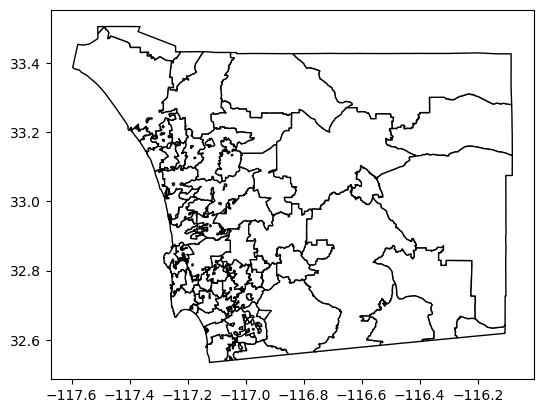

In [10]:
test1 = joined_blocks.groupby(['CTBLOCKGROUP', 'cluster'])['GEOID'].max().reset_index()
new_dict = test1.set_index('CTBLOCKGROUP')['cluster'].to_dict()

block_groups['test'] = block_groups['CTBLOCKGROUP'].map(new_dict)

new_blocks = block_groups.dissolve(by='test').reset_index()
new_blocks.plot(color='white', edgecolor='black')

### Merging with Census Tract

In [11]:
## Try out Census Tract

tracts = pd.read_csv("data/Census_Tracts_2020_20240226.csv")
tracts['geometry'] = tracts['the_geom'].apply(wkt.loads)
tracts.drop(columns=['the_geom'], inplace=True)
tracts = gpd.GeoDataFrame(tracts, crs='EPSG:4326')
tracts

OBJECTID       GEOID     CT  Shape_Length    Shape_Area  \
0         343  6073013315  13315  14731.300118  1.361873e+07   
1         116  6073005500   5500   9038.712264  4.740261e+06   
2         568  6073018517  18517  19968.703453  2.089468e+07   
3         710  6073020813  20813  54680.988261  1.417909e+08   
4         176  6073008339   8339  69458.557531  1.276369e+08   
..        ...         ...    ...           ...           ...   
731       615  6073019303  19303  52571.063397  9.102588e+07   
732       563  6073018510  18510  28092.429217  2.149973e+07   
733       316  6073012302  12302   9265.775478  4.386708e+06   
734       248  6073009308   9308  17602.726290  9.999563e+06   
735       653  6073020033  20033  19741.659768  1.771129e+07   

                                              geometry  
0    MULTIPOLYGON (((-116.95513 32.64096, -116.9551...  
1    MULTIPOLYGON (((-117.14639 32.72793, -117.1460...  
2    MULTIPOLYGON (((-117.29359 33.19467, -117.2936...  
3    MULTIPOLYGON (((-116.85075 33.05116, -116.8500...  
4    MULTIPOLYGON (((-117.24555 32.93049, -117.2453...  
..                                                 ...  
731  MULTIPOLYGON (((-117.23317 33.25363, -117.2329...  
732  MULTIPOLYGON (((-117.33332 33.21199, -117.3333...  
733  MULTIPOLYGON (((-117.08225 32.63681, -117.0826...  
734  MULTIPOLYGON (((-117.14104 32.77529, -117.1406...  
735  MULTIPOLYGON (((-117.24117 33.10212, -117.2426...  

[736 rows x 6 columns]

In [12]:
joined_tracts = df.sjoin_nearest(tracts)
joined_tracts

/Users/kelvinnguyen/anaconda3/envs/gpd/lib/python3.11/site-packages/geopandas/array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


APN  BCCCODE                        OWNNAM1  \
0      1.010101e+09    131.0    PACIFIC MARINE CREDIT UNION   
1      1.010101e+09    291.0              HRB TAX GROUP INC   
2      1.010101e+09    314.0         NORTH COUNTY PIZZA INC   
3      1.010101e+09    314.0  PIAZZA MANAGEMENT CORPORATION   
4      1.010101e+09    404.0             BRIDGESTONE RETAIL   
...             ...      ...                            ...   
94923  6.786702e+09     93.0              TBRB HOLDINGS INC   
94924  6.786702e+09    131.0           MYPOINT CREDIT UNION   
94925  6.786702e+09    325.0           C&J KIDS CORPORATION   
94926  6.786710e+09    261.0            4S RANCH HOLDCO LLC   
97866  7.602442e+09     44.0    BOYS&GIRLS CLUBS OF GREATER   

                       OWNNAM2                         OWNNAM3  \
0                         None                            None   
1              H&R BLOCK #6438                            None   
2      DBA DOMINOS PIZZA #8357                            None   
3                 OF SAN DIEGO   PIAZZA FAMILY RESTAURANTS INC   
4               OPERATIONS LLC  DBA FIRESTONE COMPLT AUTO CARE   
...                        ...                             ...   
94923      DBA MASSAGE HEIGHTS                            None   
94924                     None                            None   
94925       DBA KIDS CARE CLUB                            None   
94926                     None                            None   
97866                SAN DIEGO                            None   

                           CAREOF   STRNUM STRFRA STRDIR         STRNAM  \
0            ATTN ACCOUNTING DEPT   1278.0   None   None    ROCKY POINT   
1      ATTN BUSINESS PP TAX #6438      1.0   None   None      H&R BLOCK   
2                            None      0.0   None   None    PO BOX 4489   
3            DBA MCDONALDS #34729  23113.0   None   None   PLAZA POINTE   
4                   ATTN TAX DEPT    200.0   None      S            4TH   
...                           ...      ...    ...    ...            ...   
94923                        None  10413.0   None   None      CRAFTSMAN   
94924          C/O TAX DEPARTMENT   9420.0   None   None        FARNHAM   
94925                        None  10414.0   None   None      CRAFTSMAN   
94926                        None   3501.0   None   None       JAMBOREE   
97866                        None      0.0   None   None  PO BOX 178569   

      STRTYP STRSRM           CITY STATE CONTRY   ZIPCD1  ZIPCD2 LOCCOD  \
0         DR   None      OCEANSIDE    CA   None  92056.0     0.0   None   
1        WAY   None    KANSAS CITY    MO   None  64105.0     0.0   None   
2       None   None      OCEANSIDE    CA   None  92052.0     0.0   None   
3         DR   #100   LAGUNA HILLS    CA   None  92653.0     0.0   None   
4        AVE   #100      NASHVILLE    TN   None  37201.0     0.0   None   
...      ...    ...            ...   ...    ...      ...     ...    ...   
94923    WAY   #100      SAN DIEGO    CA   None  92127.0     0.0   None   
94924     ST   None      SAN DIEGO    CA   None  92123.0     0.0   None   
94925    WAY   None      SAN DIEGO    CA   None  92127.0     0.0   None   
94926     RD  #3000  NEWPORT BEACH    CA   None  92660.0     0.0   None   
97866   None   None      SAN DIEGO    CA   None  92177.0     0.0   None   

         LOCNUM LOCFRA LOCDIR          LOCNAM LOCTYP  LOCSRM          LOCCIT  \
0      525111.0   None   None        BASILONE     RD  000501  CAMP PENDLETON   
1           0.0   None   None  CAMP PENDLETON   None    None       OCEANSIDE   
2      520407.0   None   None        BASILONE     RD    None  CAMP PENDLETON   
3      430314.0   None   None           BROWN     ST    None  CAMP PENDLETON   
4       51091.0   None   None        BASILONE     RD    None  CAMP PENDLETON   
...         ...    ...    ...             ...    ...     ...             ...   
94923   10413.0   None   None       CRAFTSMAN    WAY  000100       SAN DIEGO   
94924   10413.0   None  

In [13]:
centroids_tract = tracts[tracts['CT'].isin(joined_tracts['CT'].value_counts().iloc[:70].index)]['geometry'].centroid

# Assume 'data' is your DataFrame and 'geometry' is your geometry column
kmeans_tracts = KMeans(n_clusters=70)
kmeans_tracts.cluster_centers_ = list(zip(centroids_tract.x, centroids_tract.y))
joined_tracts['x'] = joined_tracts['geometry'].x
joined_tracts['y'] = joined_tracts['geometry'].y
kmeans_tracts.fit(joined_tracts[['x','y']])

joined_tracts['cluster'] = kmeans_tracts.labels_


/var/folders/yx/7kn925_914qd3z72tqy9rlk80000gn/T/ipykernel_3035/3231829559.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_tract = tracts[tracts['CT'].isin(joined_tracts['CT'].value_counts().iloc[:70].index)]['geometry'].centroid
/Users/kelvinnguyen/anaconda3/envs/gpd/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: >

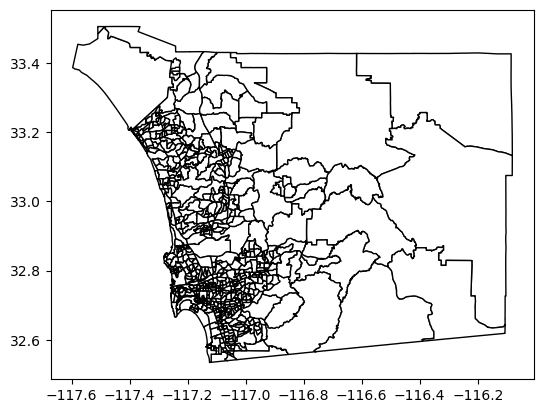

In [14]:
test1 = joined_tracts.groupby(['CT', 'cluster'])['GEOID'].max().reset_index()
new_dict = test1.set_index('CT')['cluster'].to_dict()

tracts['test'] = block_groups['CT'].map(new_dict)

new_tracts = tracts.dissolve(by='test').reset_index()
new_tracts.plot(color='white', edgecolor='black')

In [15]:
joined_tracts_new = df.sjoin_nearest(new_tracts)
joined_tracts_new

/Users/kelvinnguyen/anaconda3/envs/gpd/lib/python3.11/site-packages/geopandas/array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


APN  BCCCODE                        OWNNAM1  \
0      1.010101e+09    131.0    PACIFIC MARINE CREDIT UNION   
1      1.010101e+09    291.0              HRB TAX GROUP INC   
2      1.010101e+09    314.0         NORTH COUNTY PIZZA INC   
3      1.010101e+09    314.0  PIAZZA MANAGEMENT CORPORATION   
4      1.010101e+09    404.0             BRIDGESTONE RETAIL   
...             ...      ...                            ...   
95628  7.600480e+09     63.0  SUN CHULA VISTA EXISTING PARK   
95629  7.600480e+09    361.0          PLA-ART INTERNATIONAL   
97771  7.602360e+09     44.0         PARADISE CREEK HOUSING   
97772  7.602360e+09    261.0         PARADISE CREEK HOUSING   
97928  7.602550e+09    261.0      PARADISE CREEK II HOUSING   

                       OWNNAM2                         OWNNAM3  \
0                         None                            None   
1              H&R BLOCK #6438                            None   
2      DBA DOMINOS PIZZA #8357                            None   
3                 OF SAN DIEGO   PIAZZA FAMILY RESTAURANTS INC   
4               OPERATIONS LLC  DBA FIRESTONE COMPLT AUTO CARE   
...                        ...                             ...   
95628                   RV LLC       DBA CHULA VISTA RV RESORT   
95629   SAN DIEGO COLD STORAGE                  SEE 6188800000   
97771              PARTNERS LP  CHW PARADISE CREEK DEVELOPMENT   
97772              PARTNERS LP   DBA PARADISE CREEK APARTMENTS   
97928              PARTNERS LP                            None   

                           CAREOF   STRNUM STRFRA STRDIR          STRNAM  \
0            ATTN ACCOUNTING DEPT   1278.0   None   None     ROCKY POINT   
1      ATTN BUSINESS PP TAX #6438      1.0   None   None       H&R BLOCK   
2                            None      0.0   None   None     PO BOX 4489   
3            DBA MCDONALDS #34729  23113.0   None   None    PLAZA POINTE   
4                   ATTN TAX DEPT    200.0   None      S             4TH   
...                           ...      ...    ...    ...             ...   
95628                        None  27777.0   None   None        FRANKLIN   
95629                        None      0.0   None   None            None   
97771                  CO LLC MGP   3111.0   None      N  CAMINO DEL RIO   
97772                        None  18201.0   None   None      VON KARMAN   
97928    C/O THE RELATED CO OF CA  18201.0   None   None      VON KARMAN   

      STRTYP STRSRM          CITY STATE CONTRY   ZIPCD1  ZIPCD2 LOCCOD  \
0         DR   None     OCEANSIDE    CA   None  92056.0     0.0   None   
1        WAY   None   KANSAS CITY    MO   None  64105.0     0.0   None   
2       None   None     OCEANSIDE    CA   None  92052.0     0.0   None   
3         DR   #100  LAGUNA HILLS    CA   None  92653.0     0.0   None   
4        AVE   #100     NASHVILLE    TN   None  37201.0     0.0   None   
...      ...    ...           ...   ...    ...      ...     ...    ...   
95628     RD   #200    SOUTHFIELD    MI   None  48034.0     0.0   None   
95629   None   None          None  None   None      0.0     0.0   None   
97771   None   #800     SAN DIEGO    CA   None  92108.0     0.0   None   
97772    AVE   #900        IRVINE    CA   None  92612.0     0.0   None   
97928    AVE   #900        IRVINE    CA   None  92612.0     0.0   None   

         LOCNUM LOCFRA LOCDIR          LOCNAM LOCTYP  LOCSRM          LOCCIT  \
0      525111.0   None   None        BASILONE     RD  000501  CAMP PENDLETON   
1           0.0   None   None  CAMP PENDLETON   None    None       OCEANSIDE   
2      520407.0   None   None        BASILONE     RD    None  CAMP PENDLETON   
3      430314.0   None   None           BROWN     ST    None  CAMP PENDLETON   
4       51091.0   None   None        BASILONE     RD    None  CAMP PENDLETON   
...         ...    ...    ...             ...    ...     ...             ...   
95628     460.0   None   None       SANDPIPER    WAY    None     CHULA VISTA   
95629    2809.0   None  

In [16]:
new_industries = pd.read_csv('data/generate_labels.csv')

dict_industries = dict(zip(new_industries.Items, new_industries.Categories))

joined_tracts_new['Industry'] = joined_tracts_new['BUSTYPE'].map(dict_industries)

In [17]:
joined_tracts_new['Industry'].value_counts().index

Index(['Retail and Services', 'Construction and Manufacturing',
       'Professional and Financial', 'Health and Welfare'],
      dtype='object', name='Industry')

<Figure size 1200x600 with 0 Axes>

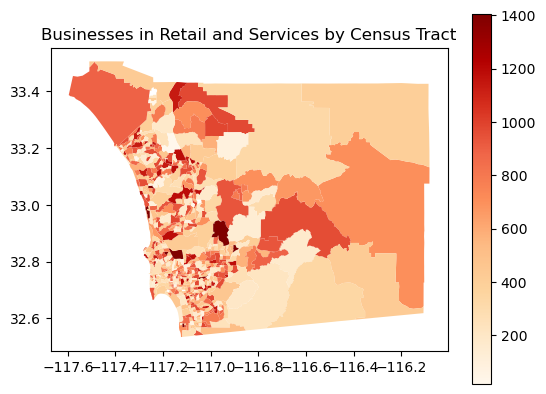

<Figure size 1200x600 with 0 Axes>

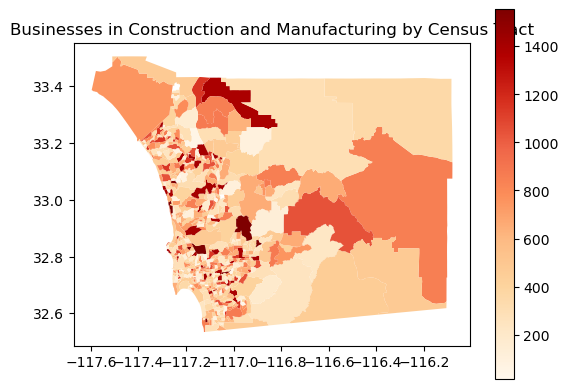

<Figure size 1200x600 with 0 Axes>

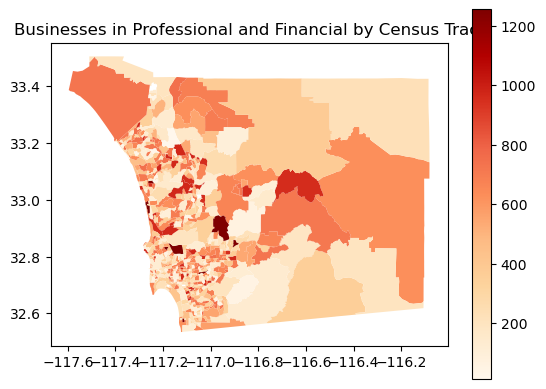

<Figure size 1200x600 with 0 Axes>

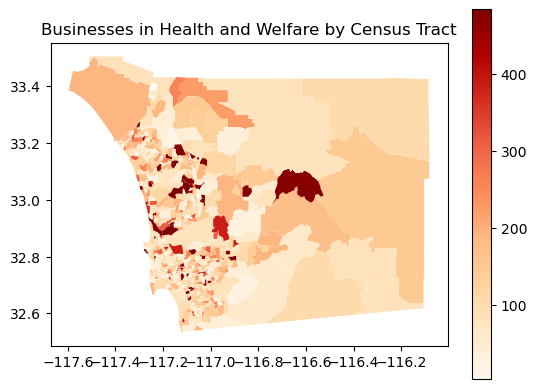

In [18]:
### For each of the 4 types of industries, graph how each looks in each the above graph

def plot_by_industry(census_tracts_data, businesses_data, industry):
    # Merge datasets based on a common key, e.g., 'census_tract_id'
    merged_data = pd.merge(census_tracts_data, businesses_data, how='left', on='CT')

    # Filter data for the specified industry
    industry_data = merged_data[merged_data['Industry'] == industry]

    # Group data by census tract and count the number of businesses
    grouped_data = gpd.GeoDataFrame(industry_data.groupby(['CT', 'geometry_x']).size().reset_index(name='business_count'))
    # display(grouped_data)
    grouped_data.set_geometry("geometry_x", inplace=True)
    grouped_data.to_crs('EPSG:4326', inplace=True)

    # Plot the data
    plt.figure(figsize=(12, 6))
    grouped_data.plot(column='business_count', legend=True,cmap='OrRd')
    # plt.bar(grouped_data['CT'], grouped_data['business_count'])
    # plt.xlabel('Census Tract ID')
    # plt.ylabel('Number of Businesses')
    plt.title(f'Businesses in {industry} by Census Tract')
    plt.show()

    return grouped_data

for i in joined_tracts_new['Industry'].value_counts().index:
    plot_by_industry(new_tracts, joined_tracts_new, i)


<Axes: >

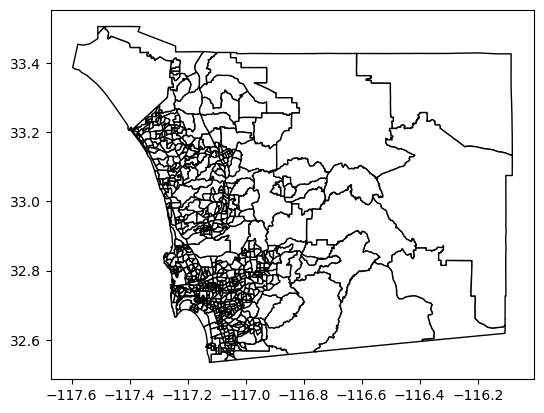

In [19]:
tracts.plot(color='white', edgecolor='black')

<Axes: >

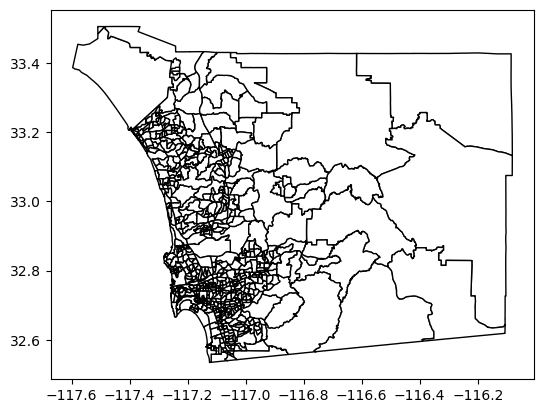

In [20]:
new_tracts.plot(color='white', edgecolor='black')

In [21]:
def plot_by_industry(census_tracts_data, businesses_data, industry):

    return grouped_data
    

for i in joined_tracts_new['Industry'].value_counts().index:
    plot_by_industry(new_tracts, joined_tracts_new, i)

NameError: name 'grouped_data' is not defined

In [22]:
print(i)

Retail and Services


In [23]:
industry = 'Health and Welfare'

In [24]:
points

point_x    point_y
0     -117.498891  33.501317
1     -117.498891  33.501317
2     -117.498891  33.501317
3     -117.498891  33.501317
4     -117.498891  33.501317
...           ...        ...
95648 -117.132925  32.631843
95649 -117.132925  32.631843
95650 -117.130477  32.627290
95659 -117.167646  32.684790
97842 -117.111539  32.821967

[98162 rows x 2 columns]

In [25]:
merged_data = pd.merge(new_tracts, joined_tracts_new, how='left', on='CT')

merged_data

test_x                                         geometry_x  OBJECTID_x  \
0         0.0  MULTIPOLYGON (((-117.13384 32.69474, -117.1338...         349   
1         0.0  MULTIPOLYGON (((-117.13384 32.69474, -117.1338...         349   
2         0.0  MULTIPOLYGON (((-117.13384 32.69474, -117.1338...         349   
3         0.0  MULTIPOLYGON (((-117.13384 32.69474, -117.1338...         349   
4         0.0  MULTIPOLYGON (((-117.13384 32.69474, -117.1338...         349   
...       ...                                                ...         ...   
98157    69.0  MULTIPOLYGON (((-117.15675 32.71990, -117.1565...         435   
98158    69.0  MULTIPOLYGON (((-117.15675 32.71990, -117.1565...         435   
98159    69.0  MULTIPOLYGON (((-117.15675 32.71990, -117.1565...         435   
98160    69.0  MULTIPOLYGON (((-117.15675 32.71990, -117.1565...         435   
98161    69.0  MULTIPOLYGON (((-117.15675 32.71990, -117.1565...         435   

          GEOID_x     CT  Shape_Length_x  Shape_Area_x           APN  BCCCODE  \
0      6073013321  13321    19329.288736  2.089773e+07  1.030202e+09      2.0   
1      6073013321  13321    19329.288736  2.089773e+07  1.030303e+09    170.0   
2      6073013321  13321    19329.288736  2.089773e+07  1.030306e+09    806.0   
3      6073013321  13321    19329.288736  2.089773e+07  1.030402e+09    298.0   
4      6073013321  13321    19329.288736  2.089773e+07  1.225213e+09    298.0   
...           ...    ...             ...           ...           ...      ...   
98157  6073016301  16301    13800.588130  1.148469e+07  7.602147e+09    313.0   
98158  6073016301  16301    13800.588130  1.148469e+07  7.602344e+09    325.0   
98159  6073016301  16301    13800.588130  1.148469e+07  7.602370e+09      2.0   
98160  6073016301  16301    13800.588130  1.148469e+07  7.602370e+09    325.0   
98161  6073016301  16301    13800.588130  1.148469e+07  7.602472e+09    261.0   

                               OWNNAM1                  OWNNAM2  \
0           FALLBROOK UNION ELEMENTARY          SCHOOL DISTRICT   
1                         TREJO MARTIN                     None   
2                BAXENDALE NURSERY INC  DBA BAXENDALE WHOLESALE   
3                      JOHNSON MICHAEL                     None   
4      SURPLUS ACQUISITION VENTURE LLC           SEE 7364995280   
...                                ...                      ...   
98157               MANSOR NASIR&LANDA    DBA SAN REMO PIZZERIA   
98158      ALL KIDS ACADEMY HEAD START                      INC   
98159    CASA DE ORO ELEMENTARY SCHOOL                     None   
98160      ALL KIDS ACADEMY HEAD START                      INC   
98161                 HDP CHURCHILL LP    HDP CHURCHILL LLC-MGP   

                      OWNNAM3                          CAREOF   STRNUM STRFRA  \
0                        None          ATTENTION RON LOVELADY    321.0   None   
1                        None                            None    718.0   None   
2                     NURSERY                            None      0.0   None   
3                        None                            None      0.0   None   
4                        None            ATTN ASST CONTROLLER  15051.0   None   
...                       ...                             ...      ...    ...   
98157                    None                            None   1623.0   None   
98158  REDWOOD HEAD START INC                            None    620.0   None   
98159                    None                            None  10227.0   None   
98160      AKA HEAD START INC      DBA CASA DE ORO HEAD START    620.0   None   
98161                    None  C/O HOUSING DEV PARTNERS OF SD    701.0   None   

      STRDIR       STRNAM STRTYP STRSRM           CITY STATE CONTRY   ZIPCD1  \
0          N         IOWA     ST   None      FALLBROOK    CA   None  92028.0   
1       None        DARLA     LN   None      FALLBROOK    CA   None  92028.0   
2       None  PO BOX 2796   None   None      FALLBROOK 

In [26]:
# # Filter data for the specified industry
# industry_data = merged_data[merged_data['Industry'] == industry]
# industry_data
# gpd.GeoDataFrame(industry_data.groupby('geometry_x').count().reset_index()[['geometry_x','CT']]).set_geometry('geometry_x').explore()

In [27]:

# Group data by census tract and count the number of businesses
grouped_data = gpd.GeoDataFrame(industry_data.groupby(['CT', 'geometry_x', 'Shape_Area_x']).size().reset_index(name='business_count'))
grouped_data['business_density'] = grouped_data['business_count'] / grouped_data['Shape_Area_x']
grouped_data.set_geometry("geometry_x", inplace=True)
grouped_data.to_crs('EPSG:4326', inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))
grouped_data.plot(column='business_density', legend=True,cmap='OrRd')
# plt.bar(grouped_data['CT'], grouped_data['business_count'])
# plt.xlabel('Census Tract ID')
# plt.ylabel('Number of Businesses')
plt.title(f'Businesses in {industry} by Census Tract')
plt.show()

NameError: name 'industry_data' is not defined

In [29]:
df['x'] = df['geometry'].x
df['y'] = df['geometry'].y

In [30]:
other_points = df[['x', 'y']].values
k = 70
kmeans = KMeans(n_clusters=k, n_init=1)
kmeans.fit(other_points)
df['cluster'] = kmeans.labels_

In [31]:

labels = pd.read_csv('data/generate_labels.csv')

In [32]:
thing

NameError: name 'thing' is not defined

CT                                         geometry_y  cluster
0  100  MULTIPOLYGON (((-117.18858 32.75915, -117.1884...        6
1  201  MULTIPOLYGON (((-117.16962 32.75783, -117.1684...        6
2  202  MULTIPOLYGON (((-117.17484 32.74988, -117.1743...        6
3  301  MULTIPOLYGON (((-117.16667 32.74899, -117.1664...        6
4  302  MULTIPOLYGON (((-117.15628 32.74840, -117.1560...        6

cluster                                         geometry_y      CT
0       -1  POLYGON ((-116.92224 32.82082, -116.92270 32.8...  134438
1        1  POLYGON ((-117.26779 33.10231, -117.26812 33.1...  104075
2        2  MULTIPOLYGON (((-117.14974 32.78933, -117.1498...   79145
3        3  POLYGON ((-117.08452 32.61704, -117.08581 32.6...  177921
4        4  MULTIPOLYGON (((-117.11346 33.08947, -117.1134...  245085

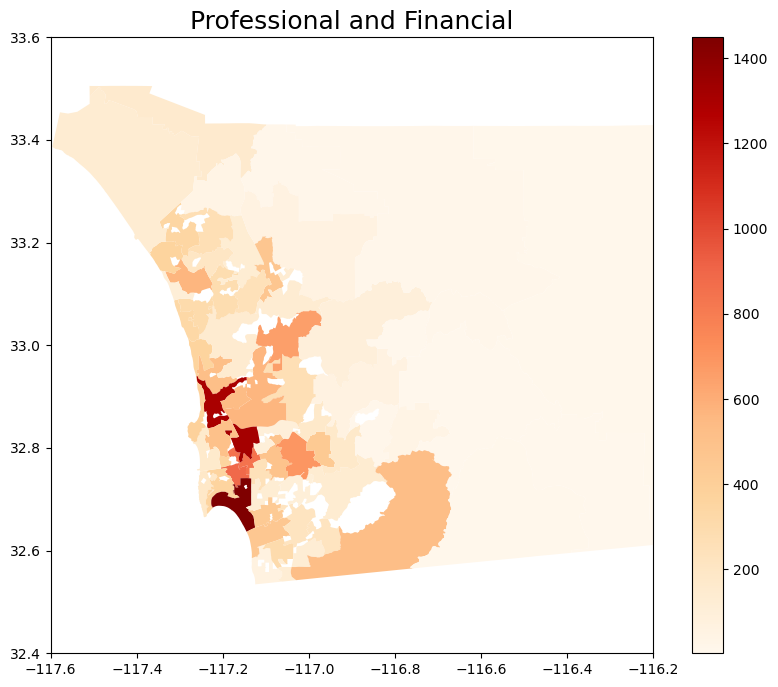

CT                                         geometry_y  cluster
0  100  MULTIPOLYGON (((-117.18858 32.75915, -117.1884...       29
1  201  MULTIPOLYGON (((-117.16962 32.75783, -117.1684...        6
2  202  MULTIPOLYGON (((-117.17484 32.74988, -117.1743...        6
3  301  MULTIPOLYGON (((-117.16667 32.74899, -117.1664...        6
4  302  MULTIPOLYGON (((-117.15628 32.74840, -117.1560...        6

cluster                                         geometry_y      CT
0       -1  POLYGON ((-116.91294 32.82405, -116.91299 32.8...  100731
1        1  POLYGON ((-117.27011 33.08871, -117.27077 33.0...  119814
2        2  MULTIPOLYGON (((-117.13315 32.78736, -117.1331...   70443
3        3  POLYGON ((-117.08452 32.61704, -117.08581 32.6...  164520
4        4  POLYGON ((-117.07106 33.06972, -117.07163 33.0...  265601

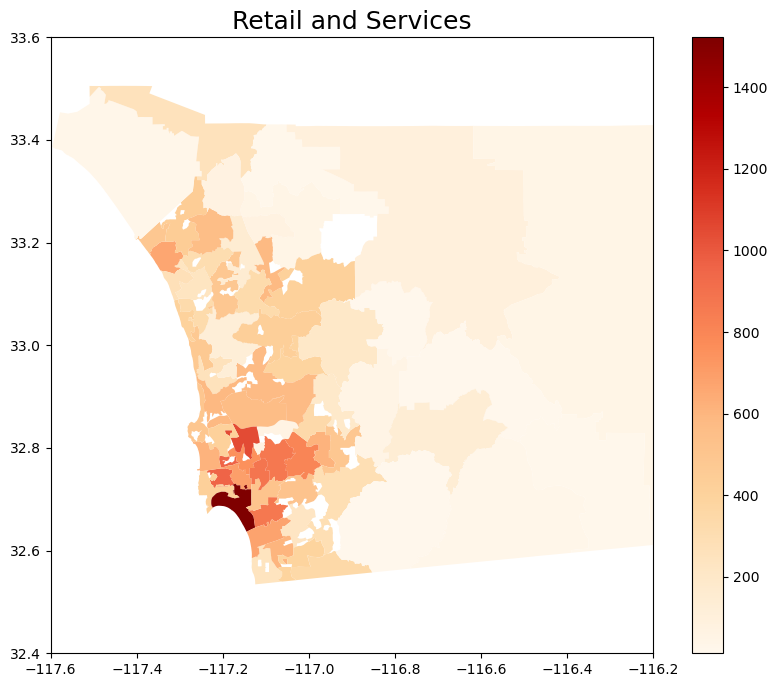

CT                                         geometry_y  cluster
0  100  MULTIPOLYGON (((-117.18858 32.75915, -117.1884...       29
1  201  MULTIPOLYGON (((-117.16962 32.75783, -117.1684...        6
2  202  MULTIPOLYGON (((-117.17484 32.74988, -117.1743...        6
3  301  MULTIPOLYGON (((-117.16667 32.74899, -117.1664...        6
4  302  MULTIPOLYGON (((-117.15628 32.74840, -117.1560...        6

cluster                                         geometry_y      CT
0       -1  POLYGON ((-116.91299 32.82396, -116.91305 32.8...  134338
1        1  POLYGON ((-117.22550 33.10704, -117.22551 33.1...  161948
2        2  POLYGON ((-117.13548 32.78896, -117.13495 32.7...   61143
3        3  POLYGON ((-117.08452 32.61704, -117.08581 32.6...  177921
4        4  POLYGON ((-117.07000 33.06941, -117.07067 33.0...  327128

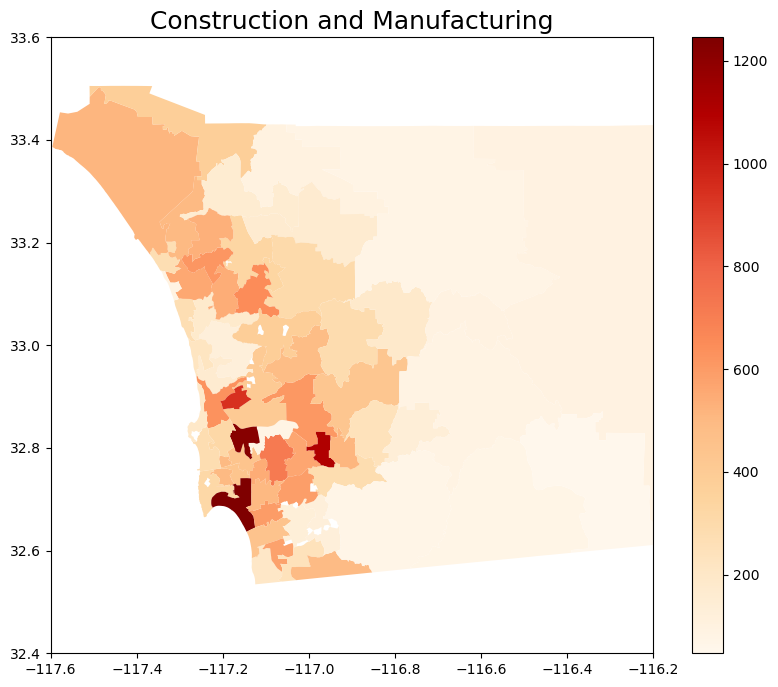

CT                                         geometry_y  cluster
0  201  MULTIPOLYGON (((-117.16962 32.75783, -117.1684...        6
1  202  MULTIPOLYGON (((-117.17484 32.74988, -117.1743...        6
2  301  MULTIPOLYGON (((-117.16667 32.74899, -117.1664...        6
3  302  MULTIPOLYGON (((-117.15628 32.74840, -117.1560...        6
4  400  MULTIPOLYGON (((-117.16157 32.75880, -117.1609...        6

cluster                                         geometry_y      CT
0       -1  POLYGON ((-116.88063 32.84352, -116.88052 32.8...  134241
1        1  POLYGON ((-117.27011 33.08871, -117.27077 33.0...  141915
2        2  POLYGON ((-117.14974 32.78933, -117.14989 32.7...   70440
3        3  POLYGON ((-117.08452 32.61704, -117.08581 32.6...  153919
4        4  POLYGON ((-117.07106 33.06972, -117.07163 33.0...  286206

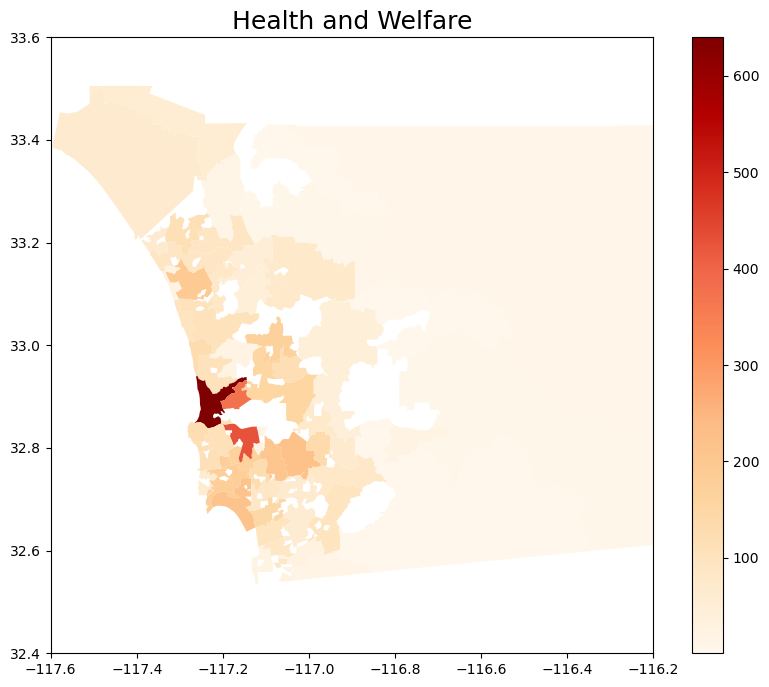

In [33]:
df = df.set_geometry('geometry')
tracts = tracts.set_geometry('geometry')

for i in labels['Categories'].unique():

    df2 = df.merge(labels, how='left', left_on='BUSTYPE',right_on='Items')[['geometry','Categories','cluster']]
    df2 = df2[df2['Categories']==i]

    pre_groupby = tracts.sjoin(df2, how='right', predicate='contains')
    geo = gpd.GeoDataFrame(pre_groupby.merge(tracts, on='CT').set_geometry('geometry_y')
                           .groupby(['CT','geometry_y'])['cluster']
                           .agg(lambda x:x.value_counts().index[0] if x.any() and x.value_counts().index[0]>0 else -1)
                           .to_frame()
                           .reset_index()).set_geometry('geometry_y')
    display(geo.head())

    shapes = geo.dissolve(by='cluster',aggfunc='sum').reset_index()
    display(shapes.head())
    total_tract = shapes.sjoin(df2,how='left',predicate='contains').groupby('geometry_y').count()
    geothing = gpd.GeoDataFrame(total_tract.reset_index()).set_geometry('geometry_y')
    fig, ax = plt.subplots(figsize=(10, 8))
    geothing.plot(ax=ax, column='CT', legend=True,cmap='OrRd').set_title(i)
    ax.set_title(i, fontsize=18)
    ax.set_xlim([-117.6, -116.2])
    ax.set_ylim([32.4, 33.6])
    plt.show()

In [34]:
shapes_counts = gpd.GeoDataFrame(shapes.sjoin(df2,how='left',predicate='contains').groupby('geometry_y').size().reset_index(), crs='EPSG:4326', geometry='geometry_y').rename(columns={0: 'count'})
shapes_counts



geometry_y  count
0   MULTIPOLYGON (((-117.24133 32.72938, -117.2412...     62
1   POLYGON ((-117.16406 32.72342, -117.16411 32.7...    183
2   MULTIPOLYGON (((-117.22047 32.72323, -117.2223...    183
3   POLYGON ((-117.17728 32.67777, -117.17741 32.6...    217
4   POLYGON ((-117.08748 32.58336, -117.08738 32.5...     25
..                                                ...    ...
59  POLYGON ((-116.31816 32.85851, -116.32223 32.8...      6
60  POLYGON ((-116.81334 32.85603, -116.81301 32.8...      3
61  POLYGON ((-116.68758 32.84176, -116.68432 32.8...     22
62  POLYGON ((-116.73722 32.79375, -116.73695 32.7...      3
63  POLYGON ((-116.54254 32.81872, -116.54219 32.8...      1

[64 rows x 2 columns]

In [35]:
def geometries_to_tracts(groupby_tracts, min_per_tract=10):
    min_per_tract = 10
    clusters_tracts = groupby_tracts.agg(lambda x:x.value_counts().index[0] if x.any() and x.value_counts().index[0]>min_per_tract else -1).to_frame()
    clusters_tracts = clusters_tracts[clusters_tracts['cluster']!=-1].reset_index()
    clusters_tracts = clusters_tracts.set_geometry('the_geom')
    clusters_tracts = clusters_tracts.merge(groupby_tracts.count(),on='the_geom', how='left').rename(columns={'cluster_x':'cluster','cluster_y':'count'})

    return  clusters_tracts.dissolve(by='cluster',aggfunc='sum').reset_index()
dissolved = geometries_to_tracts(groupby_tracts)
dissolved.plot(column='count')

NameError: name 'groupby_tracts' is not defined

In [36]:
blocks = pd.read_csv("data/Census_Blocks_2020_20240309.csv", dtype={'GEOID20': str})
blocks['geometry'] = blocks['the_geom'].apply(wkt.loads)
blocks.drop(columns=['the_geom'], inplace=True)
blocks = gpd.GeoDataFrame(blocks, crs='EPSG:4326')
blocks

OBJECTID          GEOID20       GEOID     CT  BLOCK    CTBLOCK  \
0         21466  060730191081004  6073019108  19108   1004  191081004   
1         15047  060730162021040  6073016202  16202   1040  162021040   
2         27874  060730213063001  6073021306  21306   3001  213063001   
3         23716  060730200431007  6073020043  20043   1007  200431007   
4         24872  060730205001003  6073020500  20500   1003  205001003   
...         ...              ...         ...    ...    ...        ...   
28469     18602  060730177021013  6073017702  17702   1013  177021013   
28470     22068  060730193013007  6073019301  19301   3007  193013007   
28471      8285  060730092013003  6073009201   9201   3003   92013003   
28472     22421  060730196023000  6073019602  19602   3000  196023000   
28473      9976  060730101091023  6073010109  10109   1023  101091023   

       Shape_Length    Shape_Area  \
0      35038.333218  4.108837e+07   
1        959.966234  4.193534e+04   
2       1765.784928  1.247016e+05   
3      12902.680303  3.802860e+06   
4       3191.253616  6.231309e+05   
...             ...           ...   
28469    761.155044  3.136004e+04   
28470   9316.826629  1.393697e+06   
28471   2035.300499  1.933221e+05   
28472   6019.405679  1.498224e+06   
28473   8249.732757  3.600055e+06   

                                                geometry  
0      MULTIPOLYGON (((-117.04770 33.38348, -117.0474...  
1      MULTIPOLYGON (((-116.96233 32.81333, -116.9622...  
2      MULTIPOLYGON (((-116.89186 32.70980, -116.8918...  
3      MULTIPOLYGON (((-117.18887 33.10766, -117.1888...  
4      MULTIPOLYGON (((-117.09442 33.11167, -117.0944...  
...                                                  ...  
28469  MULTIPOLYGON (((-117.29508 33.05839, -117.2950...  
28470  MULTIPOLYGON (((-117.28148 33.23111, -117.2807...  
28471  MULTIPOLYGON (((-117.14790 32.79295, -117.1478...  
28472  MULTIPOLYGON (((-117.22713 33.19000, -117.2267...  
28473  MULTIPOLYGON (((-117.09283 32.54775, -117.0928...  

[28474 rows x 9 columns]

In [37]:
wac = pd.read_csv('data/ca_wac_S000_JT00_2021.csv.gz', compression='gzip', dtype={'w_geocode': str})

sd_wac = wac[wac['w_geocode'].isin(blocks['GEOID20'])]

In [38]:
geo_sd = gpd.GeoDataFrame(sd_wac.merge(blocks, how='left', left_on='w_geocode', right_on='GEOID20')[list(sd_wac.columns) + ['geometry']], crs='EPSG:4326')
geo_sd.set_geometry('geometry', inplace=True)

In [39]:
geo_sd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15976 entries, 0 to 15975
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   w_geocode   15976 non-null  object  
 1   C000        15976 non-null  int64   
 2   CA01        15976 non-null  int64   
 3   CA02        15976 non-null  int64   
 4   CA03        15976 non-null  int64   
 5   CE01        15976 non-null  int64   
 6   CE02        15976 non-null  int64   
 7   CE03        15976 non-null  int64   
 8   CNS01       15976 non-null  int64   
 9   CNS02       15976 non-null  int64   
 10  CNS03       15976 non-null  int64   
 11  CNS04       15976 non-null  int64   
 12  CNS05       15976 non-null  int64   
 13  CNS06       15976 non-null  int64   
 14  CNS07       15976 non-null  int64   
 15  CNS08       15976 non-null  int64   
 16  CNS09       15976 non-null  int64   
 17  CNS10       15976 non-null  int64   
 18  CNS11       15976 non-null  int64   
 

In [43]:
info_tracts = {i: [] for i in range(shapes_counts.shape[0])}
info_tracts

gpd.GeoDataFrame(shapes_counts.sjoin(geo_sd, predicate='within').groupby('geometry').sum().sort_values(by='C000').reset_index()).explore()

KeyError: 'geometry'

In [80]:
geo_sd['centroid'] = geo_sd['geometry'].centroid
geo_sd.set_geometry('centroid', inplace=True)

finalized_summary = shapes_counts.sjoin(geo_sd, how='left', predicate='contains')
finalized_summary.drop(columns=['geometry'], inplace=True)

finalized_summary = gpd.GeoDataFrame(finalized_summary.groupby('geometry_y').sum().reset_index().sort_values(by='C000'), geometry='geometry_y', crs='EPSG:4326')[finalized_summary.columns[:-10]]


/var/folders/yx/7kn925_914qd3z72tqy9rlk80000gn/T/ipykernel_3035/1067627700.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo_sd['centroid'] = geo_sd['geometry'].centroid


In [81]:
finalized_summary.explore()

<Axes: >

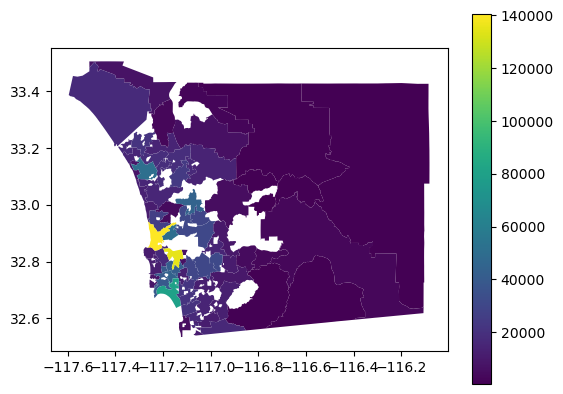

In [82]:
finalized_summary.plot(column='C000', legend=True)

In [95]:
la_jolla = gpd.GeoDataFrame(finalized_summary[['geometry_y', 'C000', 'CA01', 'CA02', 'CA03', 'CE01', 'CE02', 'CE03']].iloc[-1]).T#.explore()
la_jolla.columns = ['geometry', 'Total Number of Jobs', 'Number of jobs for workers age 29 or younger', 'Number of jobs for workers age 30 to 54', 'Number of jobs for workers age 55 or older', 
                    'Number of jobs with earnings $1250/month or less', 'Number of jobs with earnings $1251/month to $3333/month', 'Number of jobs with earnings greater than $1333/month']
la_jolla.to_csv('final_summary.csv')